### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import style
style.use("fivethirtyeight")

#### Loading the dataset (FTR format)

In [2]:
df = pd.read_feather("Sales_data.ftr")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#let's look at the shape of the data
df.shape

(186850, 6)

In [4]:
#looking at the null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
#dropping the null values, as the Order Id is null, so it is not usefull to use
df.dropna(how="all",inplace = True)

In [6]:
#after removing null values
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
#let's look at if there are any duplicates in our data or not
df.duplicated().sum()

618

In [8]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

In [10]:
print("Number of duplicates", df.duplicated().sum())

Number of duplicates 0


## Exploratory data analysis

**Month with highest order**

In [11]:
# creating a month column

def month(x):
    return x.split('/')[0] # date is in MM-DD-YYYY fromat

df['Month'] = df['Order Date'].apply(month)

In [13]:
print("Dataset with month column included")
df.head()

Dataset with month column included


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [16]:
#let's look at the data type
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

As some column has object data type, which should have been integer, we will change it. But first let's look at all the unique values in the month column.

In [17]:
df['Month'].value_counts()

Month
12            24944
10            20249
04            18257
11            17544
05            16552
03            15128
07            14275
06            13535
02            11957
08            11943
09            11603
01             9699
Order Date        1
Name: count, dtype: int64

In [18]:
#we will filter this column now
filter = df['Month'] == 'Order Date' 
df = df[~filter]

In [19]:
# chaning  the data type
df['Month'] = df['Month'].astype(int)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [22]:
print("All the data types are correct now")
df.dtypes

All the data types are correct now


Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [25]:
# creating sales column using Quantity Ordered and Price Each
df['sales'] = df['Quantity Ordered'] * df['Price Each']

In [37]:
# groupng the sales and months together
group = df.groupby(['Month'])['sales'].sum()
group

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

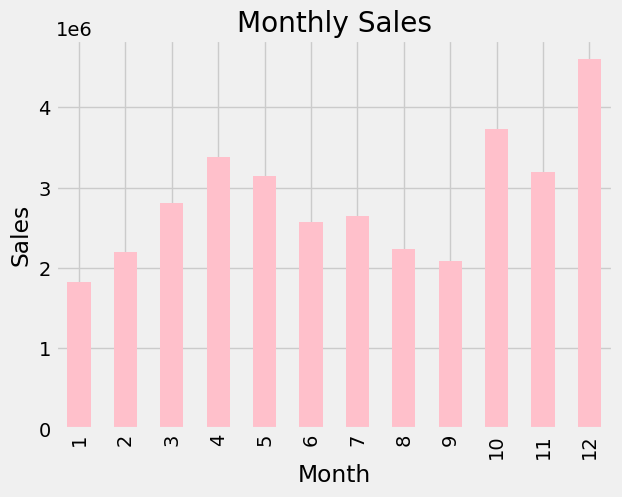

In [38]:
#ploting the grouped data
fig, ax = plt.subplots()

group.plot(kind='bar', color="pink")

ax.set_title('Monthly Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')

plt.show()

**We can see that December has the highest monthly sale and January has the lowest sale. Which is kind of interesting.**

In [39]:
df['Purchase Address']

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185686, dtype: object

In [40]:
#we will now extract the city from Purchase address column
df['Purchase Address'][0].split(',')[1]

' Dallas'

**City with highest number of orders**

In [41]:
# creating city column by extracting city from Purchase Address

df['City'] = df['Purchase Address'].str.split(',').str.get(1)


In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


Text(0.5, 0, '')

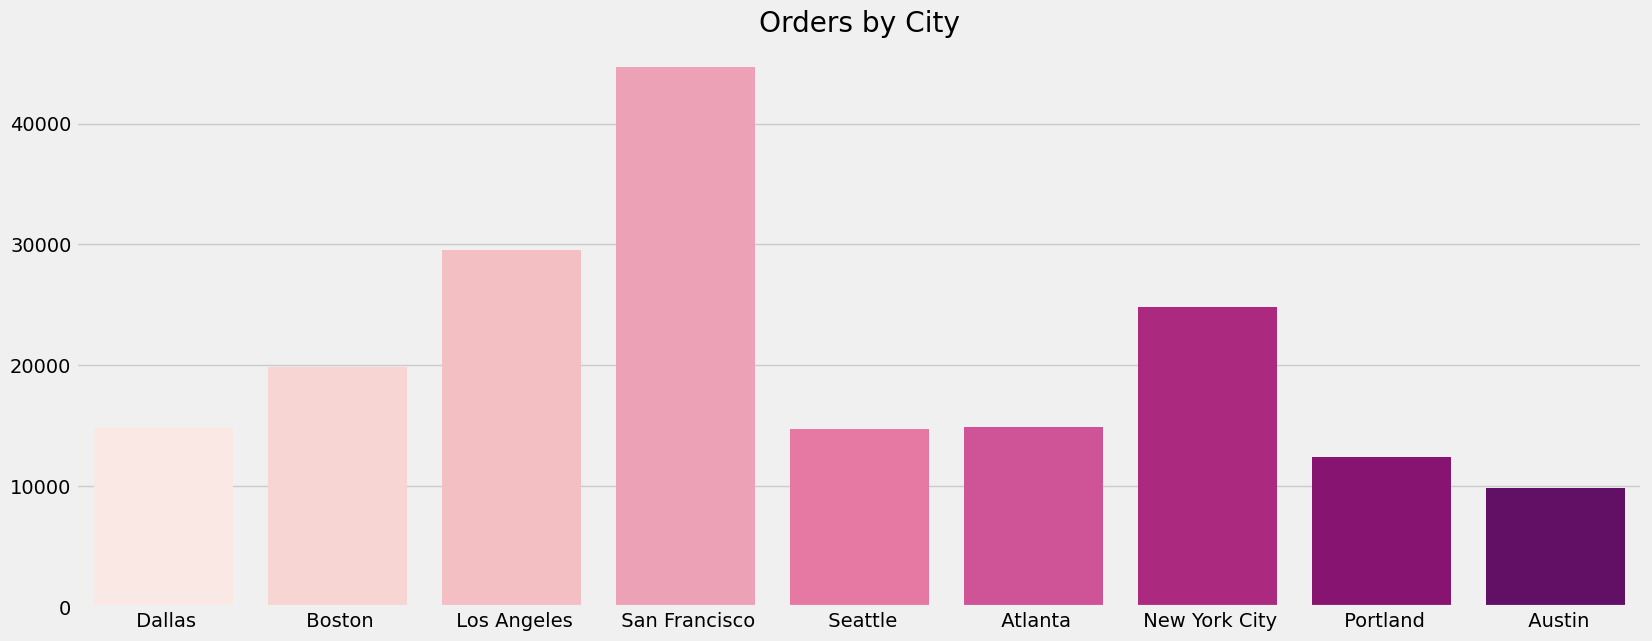

In [44]:
plt.figure(figsize=(18,7))

sns.countplot(data=df,x='City',palette="RdPu")

plt.title("Orders by City")
plt.ylabel("")
plt.xlabel("")

**San Francisco has the highest number of orders and Austin has the least.**

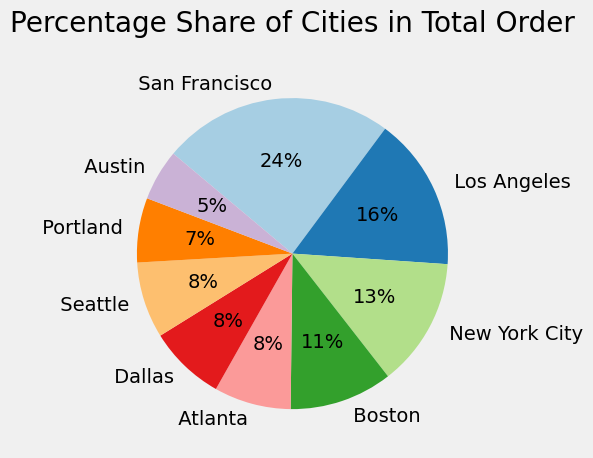

In [54]:
# Percentage share of cities in total order
city_counts = df['City'].value_counts()

# Define colors using a more varied color palette
colors = plt.cm.Paired(range(len(city_counts)))

fig, ax = plt.subplots()
city_counts.plot(kind='pie', autopct='%1.0f%%', colors=colors, ax=ax, startangle=140, counterclock=False)

ax.set_ylabel('') 
ax.set_title('Percentage Share of Cities in Total Order', pad=20)
plt.show()



In [55]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'City'],
      dtype='object')

In [58]:
count_df = df.groupby(['Product']).agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean'})
count_df = count_df.reset_index()
count_df.head()

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84


In [60]:
products = count_df['Product'].values
products

array(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'], dtype=object)

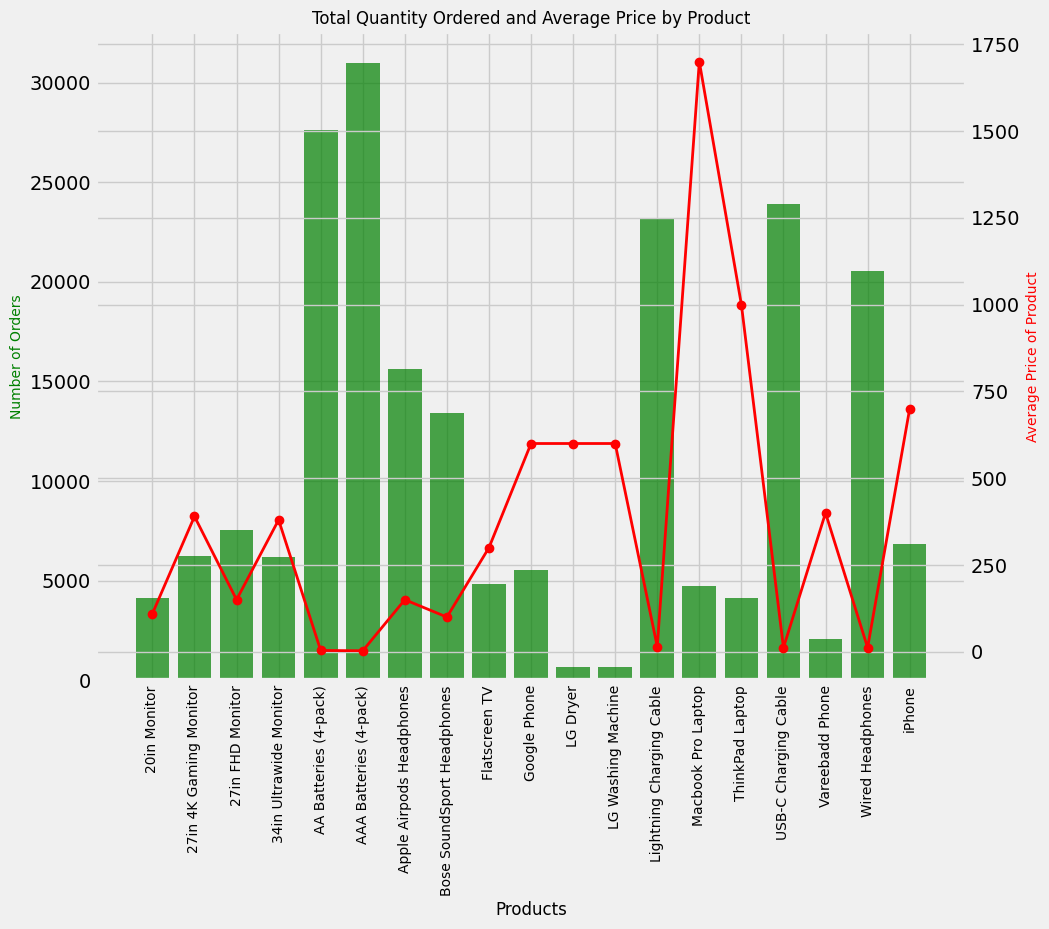

In [73]:
fig, ax1 = plt.subplots(figsize=(10, 8))

# Creating a second y-axis
ax2 = ax1.twinx()

# Plotting the bar chart for 'Quantity Ordered'

ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color='g', alpha=0.7)

# Plotting the line chart for 'Price Each'
ax2.plot(count_df['Product'], count_df['Price Each'], color='r', marker='o', linewidth=2)

# Setting x-axis labels
ax1.set_xticklabels(count_df['Product'], rotation='vertical', fontsize=10)

# Setting the axis labels and title
ax1.set_xlabel('Products', fontsize=12)
ax1.set_ylabel('Number of Orders', fontsize=10, color='g')
ax2.set_ylabel('Average Price of Product', fontsize=10, color='r')
plt.title('Total Quantity Ordered and Average Price by Product', fontsize=12)

# Showing plot
plt.show()

We can see from the graph that products like "AAA Batteries (4-pack)" and "AA Batteries (4-pack)" have the highest quantity ordered, indicating they are the most popular items with lower average price. In contrast, high-priced items such as "Macbook Pro Laptop" and "ThinkPad Laptop" have lower quantities ordered, suggesting that their higher prices may affect their demand.

In [79]:
#let's look at the top most sold products
most_sold = df['Product'].value_counts()[0:5].index
most_sold

filtered = df[df['Product'].isin(most_sold)]
filtered.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [80]:
# to look at the number top 5 of products sold in each month
filtered.groupby(['Month','Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [81]:
#let's create a pivot table
pivot = filtered.groupby(['Month','Product']).size().unstack()
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


Text(0.5, 1.0, 'Top 5 selling products by Month')

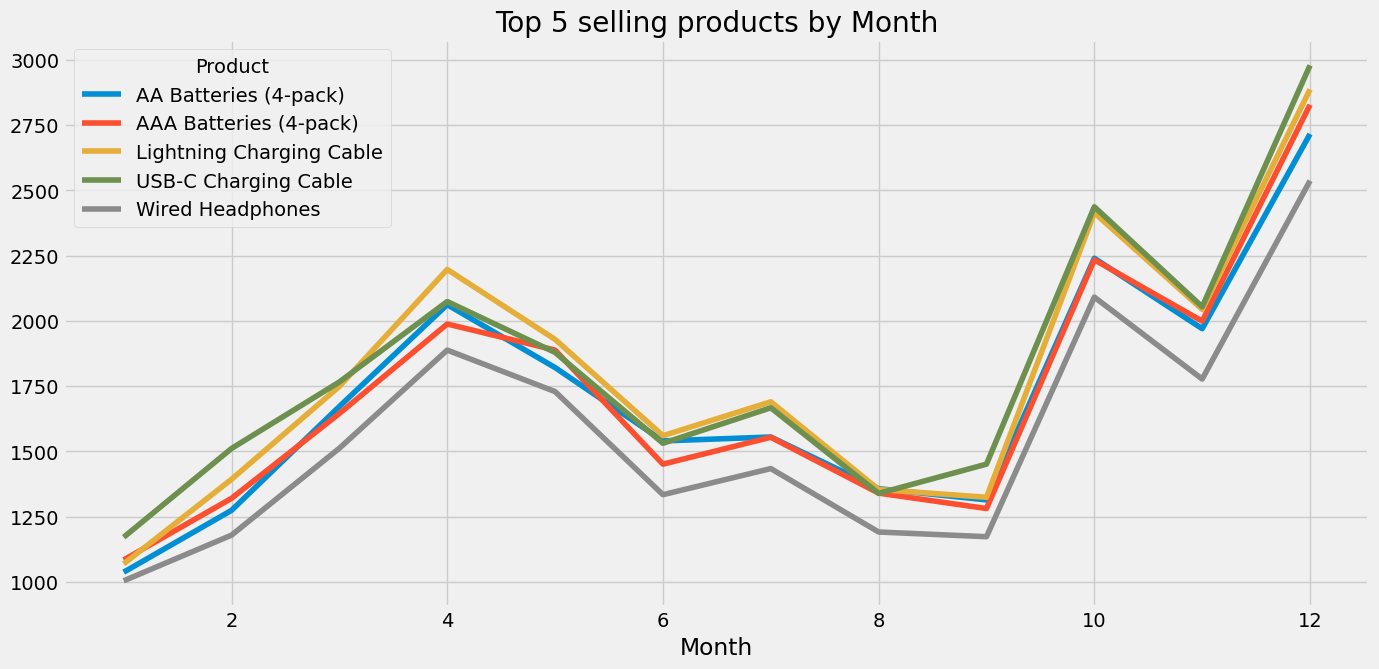

In [82]:
pivot.plot(figsize=(15,7))
plt.title("Top 5 selling products by Month")

AA Batteries (4-pack) and AAA Batteries (4-pack) show a consistent demand across all months, while the other products, such as Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones, exhibit fluctuations with significant spikes in sales during certain months

#### Products that are sold together

In [85]:
# duplicating the dataset
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco


In [87]:
dup_prod = df_dup.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product': 'Grouped Products'})
dup_prod.head()

,Order ID,Grouped Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"


In [90]:
#merging in the duplicated dataset
df_dup_prod = df_dup.merge(dup_prod,how='left',on = 'Order ID')
df_dup_prod.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Grouped Products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"


In [92]:
#now we will drop the duplicated id as we have grouped the products
df_dup_prod = df_dup_prod.drop_duplicates(subset = ['Order ID'])
df_dup_prod.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Grouped Products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"


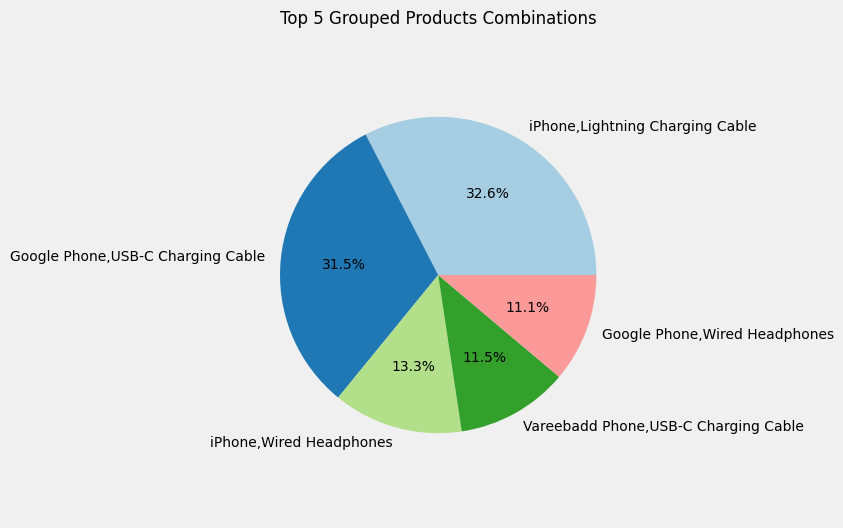

In [107]:
plt.figure(figsize=(4, 6))

# Generate colors from colormap
colors = plt.cm.Paired(range(5))

df_dup_prod['Grouped Products'].value_counts().head(5).plot(kind='pie', ylabel='', colors=colors, autopct='%1.1f%%', fontsize=10)

plt.ylabel('')
plt.title('Top 5 Grouped Products Combinations', fontsize=12)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

We can see that most people buy 'iPhone and Lightning charging cable' together. 

## Conclusion

In this project I did the EDA of products from a sales dataset. I grouped different columns together and come up with insights like:
1. December month has the most number of sales while January has least. The reasons might be Christmas, New Year.
2. San Francisco has the highest number of orders and Austin has the least.
3. AAA Batteries (4-pack)" and "AA Batteries (4-pack)" have the highest quantity ordered, these are the most popular item with least costs.
4. "Macbook Pro Laptop" and "ThinkPad Laptop" have lower quantities ordered, suggesting that their higher prices may affect their demand.
5. AA Batteries (4-pack) and AAA Batteries (4-pack) show a consistent demand across all months.
6. Most people buy 'iPhone and Lightning charging cable' together. Suggesting iPhone does not provide chargers anymore or the chargers they are providing have low charing speed.